In [ ]:
#since all the columns, apart from Volume, have a high correlation, we will pick one of the columns to represnt each one of them
#we will go with the close* column
#next, we will proceed to feature engineering by adding three indicators: EMA, RSI, and ATR

In [10]:
# Define the ATR period, e.g., 14 days
atr_period = 14

# Ensure clean_data is a copy of the original DataFrame
clean_data = clean_data.copy()

# Step 1: Calculate the True Range (TR)
clean_data.loc[:, 'High-Low'] = clean_data['High'] - clean_data['Low']
clean_data.loc[:, 'High-Close'] = abs(clean_data['High'] - clean_data['Close*'].shift(1))
clean_data.loc[:, 'Low-Close'] = abs(clean_data['Low'] - clean_data['Close*'].shift(1))

# True Range is the maximum of these three values
clean_data.loc[:, 'TR'] = clean_data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)

# Step 2: Calculate the Average True Range (ATR)
clean_data.loc[:, f'ATR_{atr_period}'] = clean_data['TR'].rolling(window=atr_period).mean()

# Clean up temporary columns
clean_data.drop(columns=['High-Low', 'High-Close', 'Low-Close', 'TR'], inplace=True)

In [12]:
#we will add the Exponential Moving Average(EMA): good choice for capturing trends in the data, especially for short-term forecasting
#we will also add the Relative Strength Index (RSI): helps measure the stock’s momentum and can be useful for indicating potential overbought or oversold conditions


# Define the period for EMA, e.g., 10-day EMA
ema_period = 10
clean_data.loc[:, f'EMA_{ema_period}'] = clean_data['Adj Close**'].ewm(span=ema_period, adjust=False).mean()

# 2. Calculate Relative Strength Index (RSI)
# Define the period for RSI, e.g., 14-day RSI
rsi_period = 14
delta = clean_data['Adj Close**'].diff(1)
gain = delta.where(delta > 0, 0)  # Only positive changes (gain)
loss = -delta.where(delta < 0, 0)  # Only negative changes (loss)

# Calculate average gain and loss
avg_gain = gain.rolling(window=rsi_period, min_periods=1).mean()
avg_loss = loss.rolling(window=rsi_period, min_periods=1).mean()

# Calculate RS (Relative Strength)
rs = avg_gain / avg_loss

# Calculate RSI
clean_data.loc[:, f'RSI_{rsi_period}'] = 100 - (100 / (1 + rs))

In [14]:
#display the resulting dataset with the new features
clean_data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,ATR_14,EMA_10,RSI_14
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,NaN,34098.160000,NaN
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,NaN,34048.705455,0.000000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,NaN,33912.917190,0.000000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,NaN,33843.446792,22.332114
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,NaN,33849.256466,41.869005


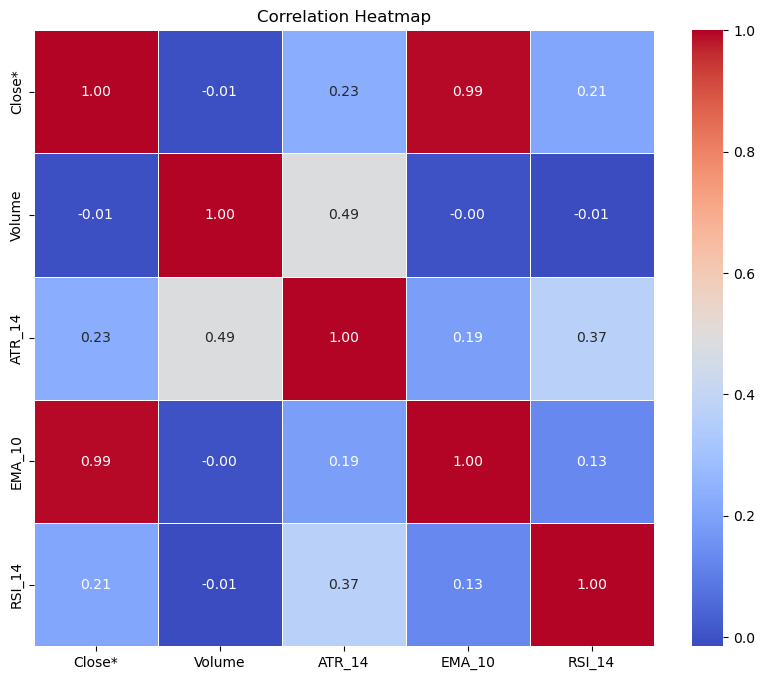

In [20]:
#let's now check the correlation with the new columns

import matplotlib.pyplot as plt
import seaborn as sns

check = clean_data.drop(columns=['Date', 'Open', 'High', 'Low', 'Adj Close**'])

# Calculate the correlation matrix
correlation_matrix = check.corr()

# Set up the plot size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display the correlation coefficients
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Use a visually appealing color map
    linewidths=0.5  # Add lines between cells for clarity
)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
#since there is no high correlation, we can proceed to model training